# Importing library

In [51]:
#importing library
#data manipulating library
import numpy as np
import pandas as pd
#visualization library
import matplotlib.pyplot as plt
#train_test_split
from sklearn.model_selection import train_test_split
#Neural Network Model to train the dataset
import tensorflow as tf
#labelencoder to label the dataset
from sklearn.preprocessing import LabelEncoder
#StandardScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Loading the Dataset

In [52]:
df=pd.read_csv('/kaggle/input/gender-classification/Transformed Data Set - Sheet1.csv')
#showing the dataset
df

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
...,...,...,...,...,...
61,Cool,Rock,Vodka,Coca Cola/Pepsi,M
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,M
63,Neutral,Hip hop,Doesn't drink,Fanta,M
64,Cool,Rock,Wine,Coca Cola/Pepsi,M


# Getting the Preliminary Information about the Dataset

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


# Checking for Null Value in Each Column

In [54]:
df.isna().sum()

Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

# There are zero null value in the Dataset

# Checking for Unique Color in Favorite Color Column

In [55]:
df['Favorite Color'].unique()

array(['Cool', 'Neutral', 'Warm'], dtype=object)

# Checking for unique value in each column

In [56]:
{column:list(df[column].unique()) for column in df.columns}

{'Favorite Color': ['Cool', 'Neutral', 'Warm'],
 'Favorite Music Genre': ['Rock',
  'Hip hop',
  'Folk/Traditional',
  'Jazz/Blues',
  'Pop',
  'Electronic',
  'R&B and soul'],
 'Favorite Beverage': ['Vodka',
  'Wine',
  'Whiskey',
  "Doesn't drink",
  'Beer',
  'Other'],
 'Favorite Soft Drink': ['7UP/Sprite', 'Coca Cola/Pepsi', 'Fanta', 'Other'],
 'Gender': ['F', 'M']}

# Adding Prefixes to Columns values

In [57]:
def add_prefix(df,column,prefix):
    return df[column].apply(lambda x:prefix+x)

In [58]:
df['Favorite Beverage']=add_prefix(df,'Favorite Beverage','b_')

In [59]:
df['Favorite Soft Drink']=add_prefix(df,'Favorite Soft Drink','s_')

In [60]:
df

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,b_Vodka,s_7UP/Sprite,F
1,Neutral,Hip hop,b_Vodka,s_Coca Cola/Pepsi,F
2,Warm,Rock,b_Wine,s_Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,b_Whiskey,s_Fanta,F
4,Cool,Rock,b_Vodka,s_Coca Cola/Pepsi,F
...,...,...,...,...,...
61,Cool,Rock,b_Vodka,s_Coca Cola/Pepsi,M
62,Cool,Hip hop,b_Beer,s_Coca Cola/Pepsi,M
63,Neutral,Hip hop,b_Doesn't drink,s_Fanta,M
64,Cool,Rock,b_Wine,s_Coca Cola/Pepsi,M


# One Hot Encoding

In [61]:
def onehot_encode(df,columns):
    for column in columns:
        dummies=pd.get_dummies(df[column])
        df=pd.concat([df,dummies],axis=1)
        df=df.drop(column,axis=1)
    return df

# Selecting Only Feature Dataset

In [62]:
ordinal_columns=df.columns[:-1]

# Applying the OneHot Function to Feature Column

In [63]:
df=onehot_encode(df,ordinal_columns)

In [64]:
df

,Gender,Cool,Neutral,Warm,Electronic,Folk/Traditional,Hip hop,Jazz/Blues,Pop,R&B and soul,...,b_Beer,b_Doesn't drink,b_Other,b_Vodka,b_Whiskey,b_Wine,s_7UP/Sprite,s_Coca Cola/Pepsi,s_Fanta,s_Other
0,F,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,F,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,F,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,F,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,F,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,M,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
62,M,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
63,M,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
64,M,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


# Correlation Matrix

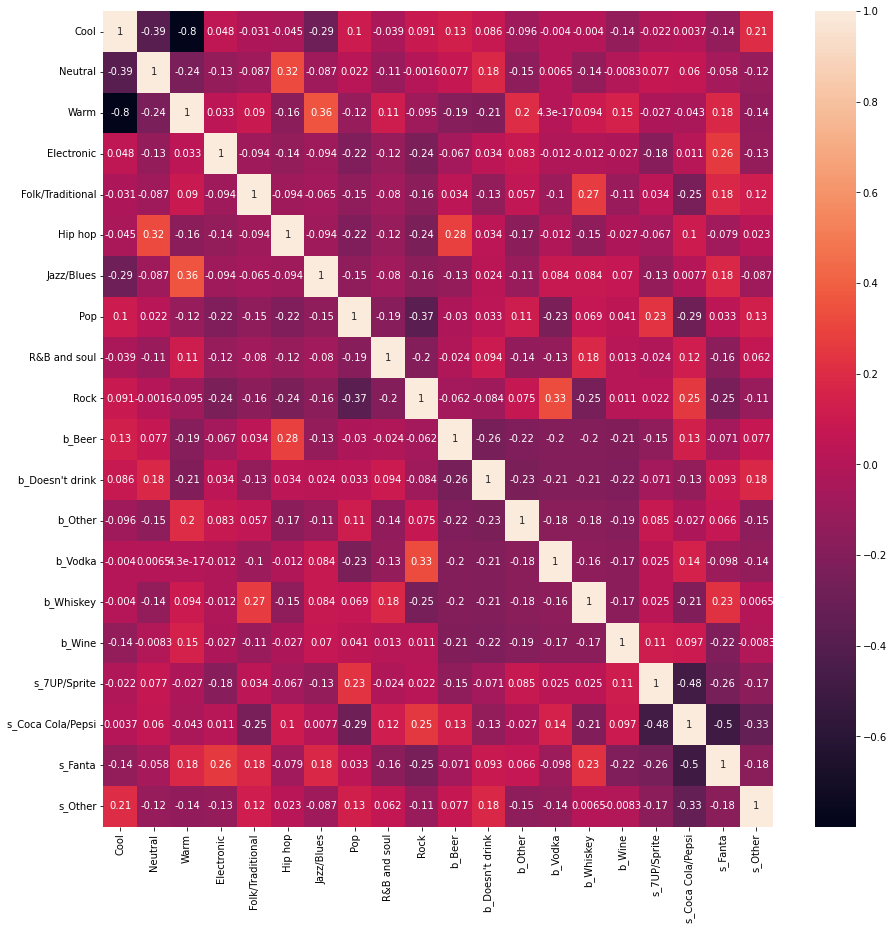

In [65]:
corr=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True)
plt.show()

# Label Encoding

In [66]:
label=LabelEncoder()
df['Gender']=label.fit_transform(df['Gender'])

# Spitting the data between feature and target columns

In [67]:
y=df['Gender']
x=df.drop('Gender',axis=1)

In [68]:
df

,Gender,Cool,Neutral,Warm,Electronic,Folk/Traditional,Hip hop,Jazz/Blues,Pop,R&B and soul,...,b_Beer,b_Doesn't drink,b_Other,b_Vodka,b_Whiskey,b_Wine,s_7UP/Sprite,s_Coca Cola/Pepsi,s_Fanta,s_Other
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
62,1,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
63,1,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
64,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


# Scaling the Feature Dataset with StandardScaler 

In [69]:

scaler=MinMaxScaler()
#scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

# Spitting the Dataset into train and test Dataset

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(46, 20)
(20, 20)
(46,)
(20,)


# Compiling the Neural Network

In [71]:
inputs=tf.keras.Input(shape=(20,))
x=tf.keras.layers.Dense(64,activation='relu')(inputs)
x=tf.keras.layers.Dense(64,activation='relu')(x)
outputs=tf.keras.layers.Dense(1,activation='sigmoid')(x)

# Compiling the model 

In [72]:
model=tf.keras.Model(inputs=inputs,outputs=outputs)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [73]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                1344      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 5,569
Trainable params: 5,569
Non-trainable params: 0
_________________________________________________________________


# Fitting the Model to train dataset

In [74]:
epochs=100
batch_size=32

In [75]:
history=model.fit(x_train,y_train,validation_split=0.2,batch_size=32,epochs=100,
                 verbose=0)

# Results

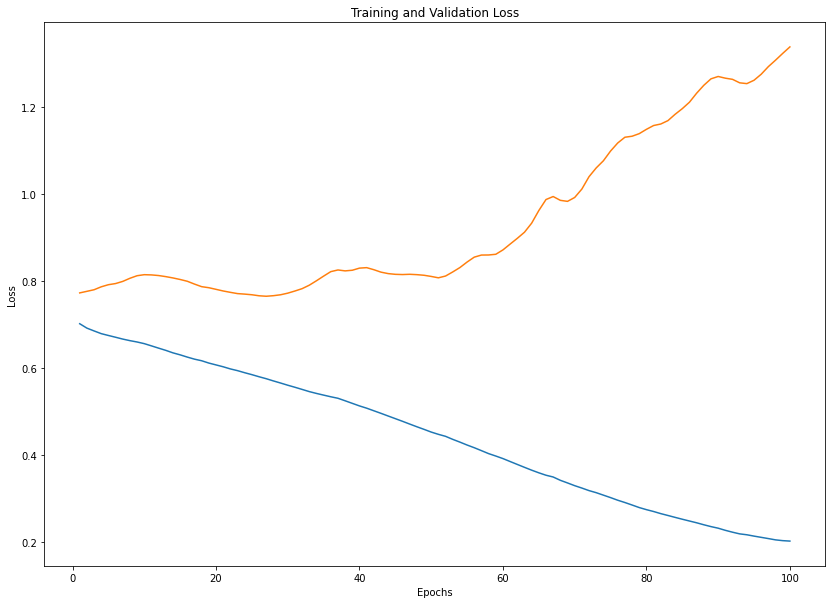

In [76]:
plt.figure(figsize=(14,10))
epochs_range=range(1,epochs+1)
train_loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(epochs_range,train_loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Evaluating the Model

In [77]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 32ms/step - loss: 0.8663 - accuracy: 0.5000


[0.8662599325180054, 0.5]

In [78]:
x

<KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense_4')>